In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [206]:
observations = np.loadtxt("dataset_1.csv", dtype=float)

In [207]:
observations.shape

(537, 65)

In [208]:
    def check_symmetric(a,rtol=1e-05,atol=1e-08):
        return np.allclose(a,a.T,rtol=rtol,atol=atol)

In [209]:
def LDA(observations,is_normalised):

    x = observations[:,:-1] #collecting data from X excluding target variable
    y = observations[:,-1]  # trget variable data
    m = 2 # no of dimension it has to be reduced

    no_observations = x.shape[0] # to no 0f samples
    no_features = observations.shape[1]-1 # total no of features
    clusters = np.unique(y) # clusters array
    len(clusters)

    # mean vectors for each class

    mean_vector_for_class0 = [0] * no_features 
    mean_vector_for_class1 = [0] * no_features
    mean_vector_for_class2 = [0] * no_features


    temp1 , temp2 , temp3 = [0]*no_features,[0]*no_features,[0]*no_features

    c0,c1,c2 = [],[],[]

    for i in range(no_observations):
        if (y[i]==0.):
            temp1 = temp1 + x[i]
            c0.append(i)
        elif  y[i] == 1.:
            temp2 = temp2 + x[i]
            c1.append(i)
        elif  y[i] == 2.:
            temp3 = temp3 + x[i]
            c2.append(i)

    mean_vector_for_class0 = temp1/len(c0)
    mean_vector_for_class1 = temp2/len(c1)
    mean_vector_for_class2 = temp3/len(c2)

    cond1 = observations[:,-1] == 0.0
    cond2 = observations[:,-1] == 1.0
    cond3 = observations[:,-1] == 2.0

    X1 = x[cond1] #getting the features matrix from the data of respective classes
    X2 = x[cond2]
    X3 = x[cond3]
    class_matrices = [X1,X2,X3]
    class_mean_vectors = [mean_vector_for_class0,mean_vector_for_class1,mean_vector_for_class2]
    
    #Calculating SW

    Sw = [[0]*no_features]*no_features
    # print(class_matrices[0][3].T.shape)
    for c in range(len(clusters)):
        for j in range(class_matrices[c].shape[0]):
            Xk_uc = (class_matrices[c][j]-class_mean_vectors[c])
    #         print(Xk_uc)
    #         print(Xk_uc[np.newaxis,:].T)
            Sw += (Xk_uc[np.newaxis,:].T)*Xk_uc
#     print(Sw)    

    #COMPUTING BETWEEN CLASS SCATTER SB

    Sb =  [[0]*no_features]*no_features
    meanof_allX = np.mean(x,axis=0)

    for c in range(len(clusters)):
        N_c = class_matrices[c].shape[0]
        ui_u= (class_mean_vectors[c]- meanof_allX) 
        Sb += (N_c) * (ui_u[np.newaxis,:].T)*ui_u
#     print(Sb)

    eigen = np.linalg.eig(np.linalg.pinv(Sw) @ (Sb))

    eigen_values1 = eigen[0]
    eigen_vectors1 = eigen[1]
    ind = np.argsort(eigen_values1)[::-1]

    eigen_values = list()
    for i in range(len(eigen_values1)):
        eigen_values.append(eigen_values1[ind[i]])
        
    eigen_vectors = eigen_vectors1[:,ind]
    W = eigen_vectors[:,:2]
#     print(W)
#     print(eigen_values)

#     print(reduced_data)
    
    total_mat = np.array(x)

    reduced_data = total_mat @ W

    X = list()
    Y = list()
    cat = list()
    for i in range(len(reduced_data)):
        X.append(reduced_data[i][0])
        Y.append(reduced_data[i][1])
        if observations[i][64] == 0:
            cat.append(0)
        elif observations[i][64] == 1:
            cat.append(1)
        elif observations[i][64] == 2:
            cat.append(2)
#     print(W)   
#     print(reduced_data)
    plt.scatter(X,Y,cmap = 'Paired', c=cat)
    plt.xlabel('X')
    plt.ylabel('Y')
    
    if(is_normalised ==1):
        plt.title('final projection of normalised data in 2D plot')
    else:
        plt.title('final projection of given data in 2D plot')

    plt.show()
    
    return reduced_data

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


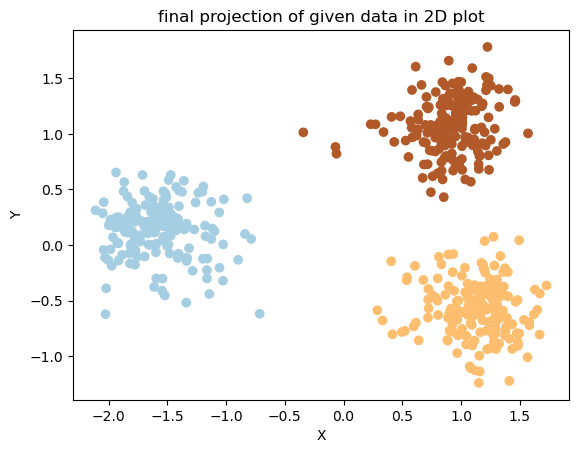

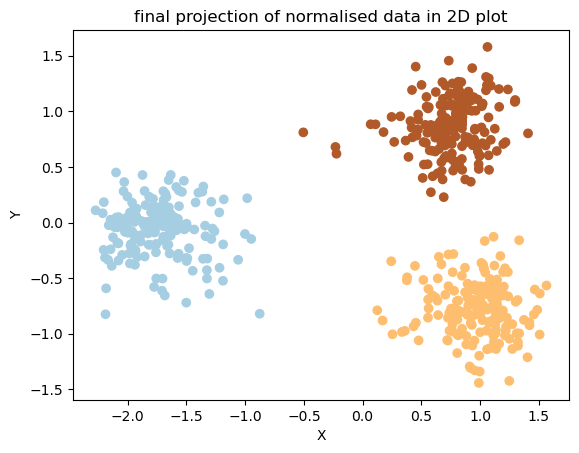

array([[-1.98053875+0.j,  0.03915259+0.j],
       [ 1.1905923 +0.j, -0.84665517+0.j],
       [ 0.99614013+0.j,  0.60368262+0.j],
       ...,
       [ 1.09045902+0.j,  0.74403066+0.j],
       [ 0.81916878+0.j,  0.53404226+0.j],
       [-1.58383466+0.j, -0.06862381+0.j]])

In [210]:
reduced_data = LDA(observations,0)

x1 = observations[:,:-1]
y1 = observations[:,-1]

mean = np.mean(x1,axis=0)
std = np.std(x1,axis=0)

x1  = (x1 -mean)
x1 = np.c_[x1,y1]
LDA(x1,1)

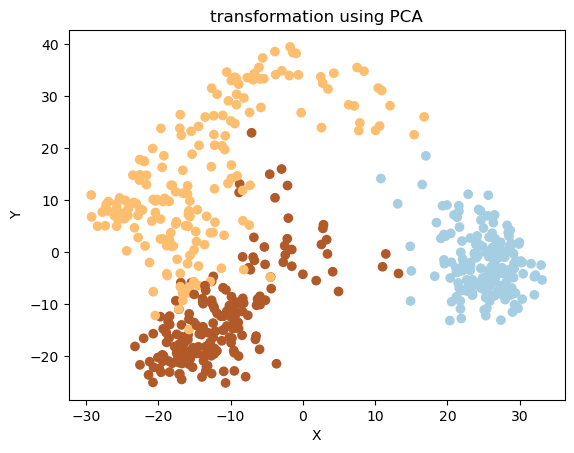

In [211]:
red_data = PCA(n_components = 2)
x = observations[:,:-1] #collecting data from X excluding target variable
y = observations[:,-1]  # trget variable data
m = 2 # no of dimension it has to be reduced

red_data.fit(x)


transformed_data =red_data.transform(x)

X = list()
Y = list()
cat = list()
for i in range(len(transformed_data)):
  
    if observations[i][64] == 0:
        cat.append(0)
    elif observations[i][64] == 1:
        cat.append(1)
    elif observations[i][64] == 2:
        cat.append(2)
    X.append(transformed_data[i][0])
    Y.append(transformed_data[i][1])

plt.scatter(X,Y,cmap = 'Paired', c= cat)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('transformation using PCA')
plt.show()
    

In [274]:
# BAYES CLASSIFIER USING TRAINING SET
reduced_data.shape
projected_data = reduced_data
new_data = np.c_[projected_data,observations[:,-1]]

In [275]:
new_data

array([[-1.81758913+0.j,  0.24182414+0.j,  0.        +0.j],
       [ 1.35354192+0.j, -0.64398362+0.j,  1.        +0.j],
       [ 1.15908975+0.j,  0.80635417+0.j,  2.        +0.j],
       ...,
       [ 1.25340864+0.j,  0.94670221+0.j,  2.        +0.j],
       [ 0.9821184 +0.j,  0.73671382+0.j,  2.        +0.j],
       [-1.42088504+0.j,  0.13404775+0.j,  0.        +0.j]])

In [311]:
#Shuffling and splitting data of obtained data
np.random.shuffle(new_data)
fraction = 0.75
split_index = int(fraction*len(new_data))

train_data,test_data = np.split(new_data,[split_index])

print(train_data.shape)
print(test_data.shape)

(402, 3)
(135, 3)


In [312]:
classes = np.unique(train_data[:,-1])

In [313]:
classes

array([0.+0.j, 1.+0.j, 2.+0.j])

In [314]:
class_data = {}
for c in classes:
    class_data[c] = train_data[train_data[:,-1]==c]

In [315]:
prior_probability_for_classes = {}
sample_space = train_data.shape[0]
count_on_each_class = {}
for c in classes:
    count_on_each_class[c] = class_data[c].shape[0]
    print(count_on_each_class[c])
    prior_probability_for_classes[c] = count/sample_space
    print(prior_probability_for_classes[c])

127
0.3208955223880597
134
0.3208955223880597
141
0.3208955223880597


In [316]:
class_means = {}
for c in classes:
    class_means[c] = np.mean(class_data[c],axis=0)
    

In [317]:
class_means

{0j: array([-1.57060197+0.j,  0.14414753+0.j,  0.        +0.j]),
 (1+0j): array([ 1.13821686+0.j, -0.5687118 +0.j,  1.        +0.j]),
 (2+0j): array([0.92417109+0.j, 1.06786274+0.j, 2.        +0.j])}

In [318]:
class_variances = {}

for c in classes:
    class_variances[c] = np.var(class_data[c],axis=0)

In [319]:
class_variances

{0j: array([0.08170409, 0.05237428, 0.        ]),
 (1+0j): array([0.06991385, 0.06005978, 0.        ]),
 (2+0j): array([0.06976562, 0.06433996, 0.        ])}

In [320]:
count_on_each_class

{0j: 127, (1+0j): 134, (2+0j): 141}

In [321]:
def getprob(val,mean,variance):
    
    exp = np.exp(-(val-mean)**2)/(2*variance)
    pdfval = (1/np.sqrt(2*np.pi*variance))*exp
    return pdfval

In [322]:
count_on_each_class_using_gaussian_pdf = {count_on_each_class_using_gaussian_pdf: 0 for count_on_each_class_using_gaussian_pdf in range(3)}


In [323]:
means_of_classes ={}
variances_of_classes = {}

for c in classes:
    means_of_classes[c] = [np.mean(class_data[c][:,0],axis=0),np.mean(class_data[c][:,1],axis=0)]
    variances_of_classes[c] = [np.var(class_data[c][:,0],axis=0),np.var(class_data[c][:,1],axis=0)]

In [324]:
print(means_of_classes)
print(variances_of_classes)

{0j: [(-1.5706019679267584+0j), (0.14414752551556687+0j)], (1+0j): [(1.1382168556456524+0j), (-0.5687118040582262+0j)], (2+0j): [(0.9241710873327545+0j), (1.067862738767345+0j)]}
{0j: [0.08170409125611129, 0.05237427881335551], (1+0j): [0.06991385395349226, 0.06005978234831919], (2+0j): [0.06976561823949115, 0.06433996270664388]}


In [325]:
#calculating accuracy for train data using baysian classifier

def get_class(x):
    prob_for_each_class = {}
    for i in classes:
        prob_for_each_class[i] = getprob(x[0],means_of_classes[i][0],variances_of_classes[i][0])* getprob(x[1],means_of_classes[i][1],variances_of_classes[i][1])
    v = list(prob_for_each_class.values())
    k = list(prob_for_each_class.keys())
    return k[v.index(max(v))]

#finding accuracy for train and test data
correct_count_train_data = 0
correct_count_test_data = 0
for i in train_data:
    if(get_class(i) == i[2]):
        correct_count_train_data+=1
for i in test_data:
    if(get_class(i) == i[2]):
        correct_count_test_data+=1
        
print("Accuracy for train_data :",correct_count/train_data.shape[0])
print("Accuray for test data :",correct_count_test_data/test_data.shape[0])
      

Accuracy for train_data : 1.0
Accuray for test data : 1.0


In [326]:
#plotting the test data with classification boundary

Text(0.5, 1.0, 'Scatter Plot of test-data')

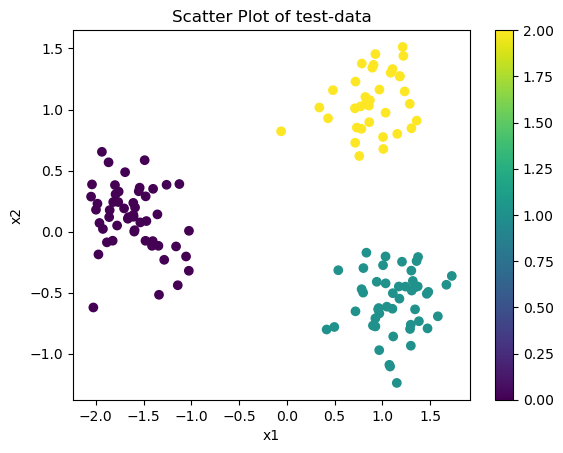

In [327]:
x = test_data[:,:2]
y = test_data[:,-1]
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')
plt.colorbar()

    # Set the axis labels and title
plt.xlabel('x1')
plt.ylabel('x2')
#     ax.invert_yaxis()
plt.title('Scatter Plot of test-data')

Text(0.5, 1.0, 'Scatter Plot of  train-data')

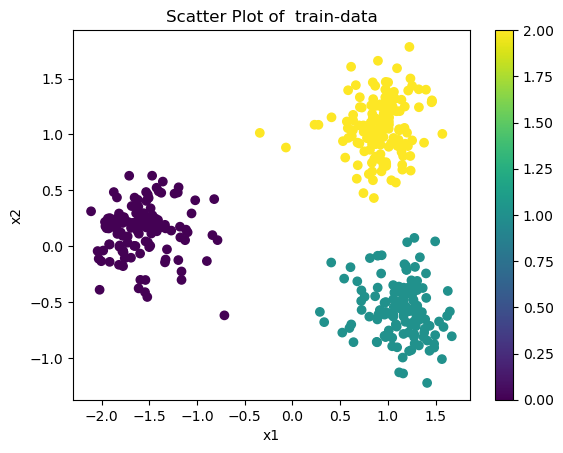

In [328]:
x = train_data[:,:2]
y = train_data[:,-1]
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')
plt.colorbar()

    # Set the axis labels and title
plt.xlabel('x1')
plt.ylabel('x2')
#     ax.invert_yaxis()
plt.title('Scatter Plot of  train-data')

In [329]:
x = np.arange(-3,3,0.01)
X,Y = np.meshgrid(x,x)
print(X)
print(Y)

[[-3.   -2.99 -2.98 ...  2.97  2.98  2.99]
 [-3.   -2.99 -2.98 ...  2.97  2.98  2.99]
 [-3.   -2.99 -2.98 ...  2.97  2.98  2.99]
 ...
 [-3.   -2.99 -2.98 ...  2.97  2.98  2.99]
 [-3.   -2.99 -2.98 ...  2.97  2.98  2.99]
 [-3.   -2.99 -2.98 ...  2.97  2.98  2.99]]
[[-3.   -3.   -3.   ... -3.   -3.   -3.  ]
 [-2.99 -2.99 -2.99 ... -2.99 -2.99 -2.99]
 [-2.98 -2.98 -2.98 ... -2.98 -2.98 -2.98]
 ...
 [ 2.97  2.97  2.97 ...  2.97  2.97  2.97]
 [ 2.98  2.98  2.98 ...  2.98  2.98  2.98]
 [ 2.99  2.99  2.99 ...  2.99  2.99  2.99]]


In [330]:
final_points  = np.c_[X.ravel(),Y.ravel()]

In [331]:
print(final_points)

[[-3.   -3.  ]
 [-2.99 -3.  ]
 [-2.98 -3.  ]
 ...
 [ 2.97  2.99]
 [ 2.98  2.99]
 [ 2.99  2.99]]


In [332]:
predicted_clases  = []

for i in range(len(final_points)):
    predicted_clases.append(get_class(final_points[i]))

In [333]:
prediced_array = np.array(predicted_clases)

In [334]:
prediced_array.shape

(360000,)

In [335]:
Z = prediced_array.reshape(Y.shape)

In [336]:
Z.shape

(600, 600)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:2829: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


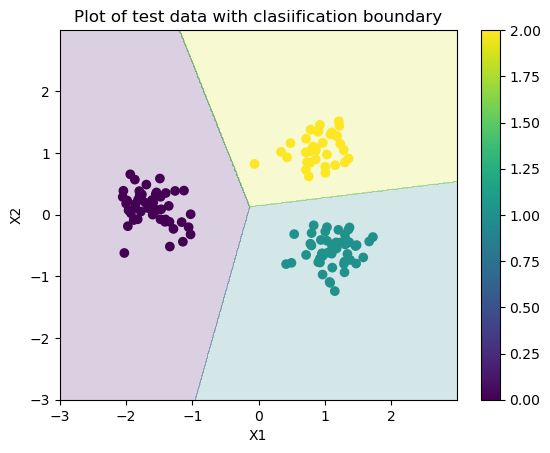

In [337]:
plt.contourf(X,Y,Z,alpha=0.2)
plt.scatter(test_data[:,0],test_data[:,1],c=test_data[:,2],cmap='viridis')
plt.colorbar()

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Plot of test data with clasiification boundary')
plt.show()

In [338]:
#finding confusion matrices of train and tes data
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [339]:
predicted_class = []
for i in train_data:
    predicted_class.append(get_class(i))
pred = np.array(predicted_class)
confusion_matrix_train_data = confusion_matrix(pred, train_data[:,2])

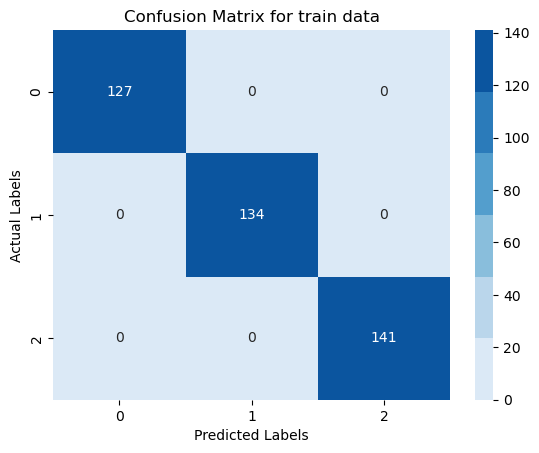

In [340]:
cmap = sns.color_palette("Blues")

axis = sns.heatmap(confusion_matrix_train_data, annot=True, cmap=cmap, fmt="d")

axis.set_xlabel('Predicted Labels')
axis.set_ylabel('Actual Labels')
axis.set_title('Confusion Matrix for train data')

# Show plot
plt.show()

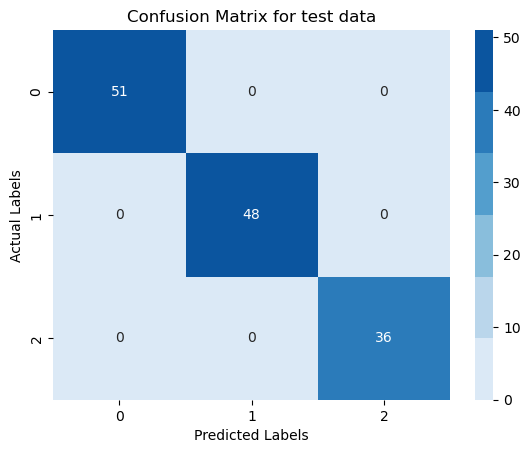

In [341]:
predicted_class_test = []
for i in test_data:
    predicted_class_test.append(get_class(i))
pred_test = np.array(predicted_class_test)
confusion_matrix_test_data = confusion_matrix(pred_test, test_data[:,2])
cmap = sns.color_palette("Blues")

axis = sns.heatmap(confusion_matrix_test_data, annot=True, cmap=cmap, fmt="d")

axis.set_xlabel('Predicted Labels')
axis.set_ylabel('Actual Labels')
axis.set_title('Confusion Matrix for test data')

# Show plot
plt.show()